# Loading Packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline
df=pd.read_csv("train.csv")

# Extraction of all kind of data from the .csv file

Getting the first 5 rows of the file

In [9]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


Getting the last 10 rows

In [10]:
df.tail(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88848,F00155919,2999,1,0,2,20,51.0,5,3,0
88849,F00155920,2999,1,0,2,20,52.0,0,3,0
88850,F00155923,2999,1,0,2,10,19.0,16,2,1
88851,F00155925,3164,1,0,2,10,11.0,36,1,0
88852,F00155931,3165,1,0,2,60,44.0,15,2,0
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


Total no. of rows and columns

In [11]:
df.shape

(88858, 10)

Index of all columns

In [12]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

Datatypes of all columns

In [13]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

It describes the columns by their count,mean,min,etc.(Only for continuous Variable)

In [14]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


It does the same but includes categorical variables

In [15]:
df.describe(include = 'all')

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
unique,88858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F00001511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,NaN,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,NaN,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,NaN,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,NaN,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000


Shows the count of missing values if present

In [16]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

Here, there are 9000 missing values in Number_Weeks_Used column.
We need fill up those.

Creating a table which contains unique count and null count

In [17]:
temp = pd.DataFrame(index = df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()
temp

,data_type,null_count,unique_count
ID,object,0,88858
Estimated_Insects_Count,int64,0,71
Crop_Type,int64,0,2
Soil_Type,int64,0,2
Pesticide_Use_Category,int64,0,3
Number_Doses_Week,int64,0,20
Number_Weeks_Used,float64,9000,64
Number_Weeks_Quit,int64,0,51
Season,int64,0,3
Crop_Damage,int64,0,3


pivot table for finding relation between pesticide use category and number of weeks of its use.

In [18]:
table = pd.pivot_table(data=df,index='Pesticide_Use_Category',values='Number_Weeks_Used',aggfunc=np.sum)
table

,Number_Weeks_Used
Pesticide_Use_Category,
1,0.0
2,1523262.0
3,762591.0


It is clear from above that Number of weeks used for '0' Pesticide_use_category is zero.

Pivot table for finding relation between soil type and number of weeks of its use.

In [19]:
table1 = pd.pivot_table(data=df,index='Soil_Type',values='Number_Weeks_Used',aggfunc=np.sum)
table1

,Number_Weeks_Used
Soil_Type,
0,1270043.0
1,1015810.0


Relation between soiltype and crop type

In [20]:
cross1 = pd.crosstab(df['Soil_Type'],df['Crop_Type'])
cross1


Crop_Type,0,1
Soil_Type,,
0,28699,19425
1,34890,5844


Relation between soil type and pesticide used category

In [21]:
cross2 = pd.crosstab(df['Soil_Type'],df['Pesticide_Use_Category'])
cross2

Pesticide_Use_Category,1,2,3
Soil_Type,,,
0,416,35246,12462
1,421,28463,11850


Finding the maximum no. weeks used in crop yield

In [22]:
maxi = df['Number_Weeks_Used'].mode()
maxi

0    20.0
dtype: float64

# Missing Values

From the above, for Pesticide_Use_Category '0':- Number of weeks pesticide was used is zero.
And for other Pesticide_Use_Category :- Number of weeks pesticide was used is considered as 20(maximum no.)
 Thus,the empty cells are filled in the column.

In [23]:

for i in range(0,len(df)):
    if pd.isnull(df['Number_Weeks_Used'][i])==True:
        if (df['Pesticide_Use_Category'][i] == 1):
            df['Number_Weeks_Used'][i] = 0.0
        else:
            df['Number_Weeks_Used'][i] = 20.0

In [24]:
df['Number_Weeks_Used'].isnull().sum()

0

Confirming that our vales filled properly

In [25]:
df[['Number_Weeks_Used','Pesticide_Use_Category']].head(10)

,Number_Weeks_Used,Pesticide_Use_Category
0,0.0,1
1,0.0,1
2,0.0,1
3,0.0,1
4,0.0,1
5,0.0,1
6,0.0,1
7,0.0,1
8,0.0,1
9,0.0,1


In [26]:
df[['Number_Weeks_Used','Pesticide_Use_Category']].tail(10)

,Number_Weeks_Used,Pesticide_Use_Category
88848,51.0,2
88849,52.0,2
88850,19.0,2
88851,11.0,2
88852,44.0,2
88853,12.0,2
88854,20.0,2
88855,40.0,2
88856,25.0,2
88857,37.0,2


# Change of  required DataTypes

In [27]:
df=df.astype({'Number_Weeks_Used':'int64'})

In [28]:
df.dtypes

ID                         object
Estimated_Insects_Count     int64
Crop_Type                   int64
Soil_Type                   int64
Pesticide_Use_Category      int64
Number_Doses_Week           int64
Number_Weeks_Used           int64
Number_Weeks_Quit           int64
Season                      int64
Crop_Damage                 int64
dtype: object

# Univariate analysis

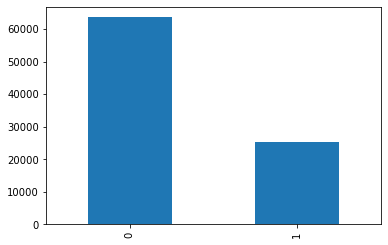

In [29]:
df['Crop_Type'].value_counts().plot.bar()

More no. of crops are of Type '0'

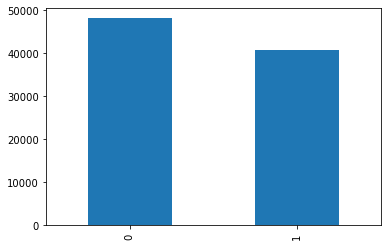

In [30]:
df['Soil_Type'].value_counts().plot.bar()

More cropes are cultivated in soil type '0'.

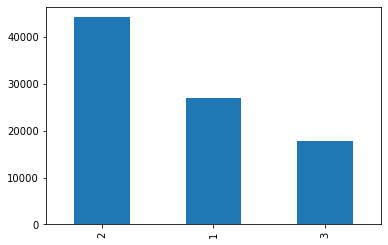

In [31]:
df['Season'].value_counts().plot.bar()

Season 2 favours in more crop yield

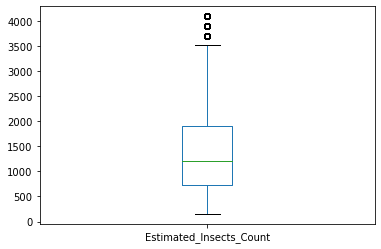

In [32]:

df['Estimated_Insects_Count'].plot.box()

Presence of outliers above 3500 in Estimated_Insects_Count.

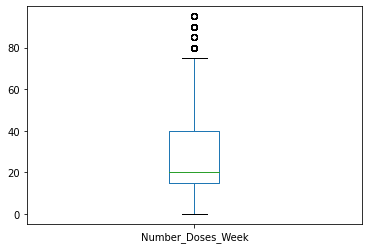

In [33]:
df['Number_Doses_Week'].plot.box()

Presence of outliers above 70 in Number_Doses_Week.

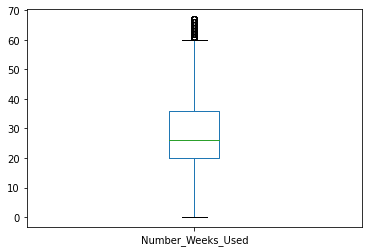

In [34]:
df['Number_Weeks_Used'].plot.box()

Presence of outliers above 60 in Number_Weeks_Used.

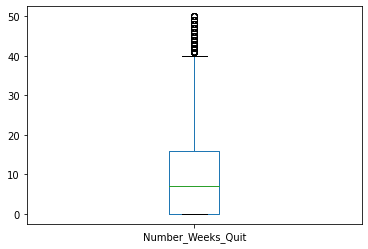

In [35]:
df['Number_Weeks_Quit'].plot.box()

Presence of outliers above 40 in Number_Weeks_Quit.

# Treating the presence of Outliers

Outliers are replaced by mean in all respective columns

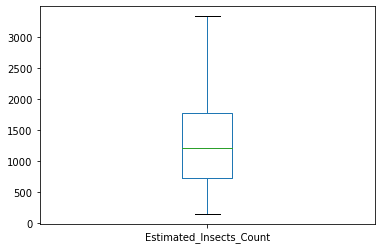

In [36]:
df.loc[df['Estimated_Insects_Count']>3500,'Estimated_Insects_Count']=np.mean(df['Estimated_Insects_Count'])
df['Estimated_Insects_Count'].plot.box()

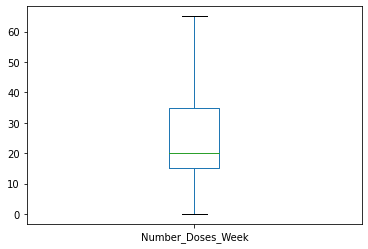

In [37]:
df.loc[df['Number_Doses_Week']>69,'Number_Doses_Week']=np.mean(df['Number_Doses_Week'])
df['Number_Doses_Week'].plot.box()

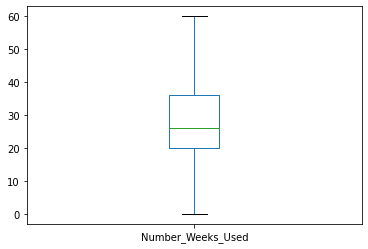

In [38]:
df.loc[df['Number_Weeks_Used']>60,'Number_Weeks_Used']=np.mean(df['Number_Weeks_Used'])
df['Number_Weeks_Used'].plot.box()

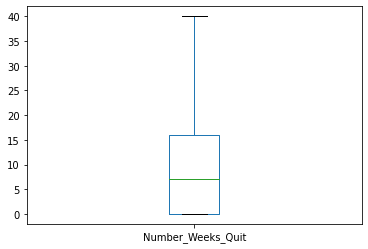

In [39]:
df.loc[df['Number_Weeks_Quit']>40,'Number_Weeks_Quit']=np.mean(df['Number_Weeks_Quit'])
df['Number_Weeks_Quit'].plot.box()

The datatypes are changed after outlier treatment. So,change to required data type

In [40]:
df.dtypes

ID                          object
Estimated_Insects_Count    float64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week          float64
Number_Weeks_Used          float64
Number_Weeks_Quit          float64
Season                       int64
Crop_Damage                  int64
dtype: object

In [41]:
df=df.astype({'Estimated_Insects_Count':'int64','Number_Doses_Week':'int64','Number_Weeks_Used':'int64','Number_Weeks_Quit':'int64'})

In [42]:
df.dtypes

ID                         object
Estimated_Insects_Count     int64
Crop_Type                   int64
Soil_Type                   int64
Pesticide_Use_Category      int64
Number_Doses_Week           int64
Number_Weeks_Used           int64
Number_Weeks_Quit           int64
Season                      int64
Crop_Damage                 int64
dtype: object

# Bivariate Analysis

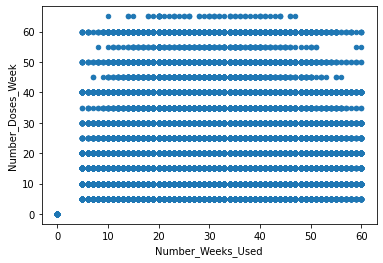

In [43]:
df.plot.scatter('Number_Weeks_Used','Number_Doses_Week')

The above scatter plot shows a linear relation between them.Correlation will tend to zero in this case

The below scatter plot takes shows crop_damage in colour.

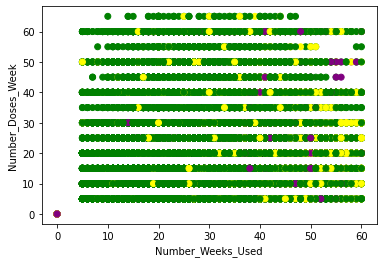

In [44]:
fig, ax=plt.subplots()
colours={0:'green',1:'yellow',2:'purple'}
ax.scatter(df['Number_Weeks_Used'],df['Number_Doses_Week'],c=df['Crop_Damage'].apply(lambda x : colours[x]))
plt.xlabel('Number_Weeks_Used')
plt.ylabel('Number_Doses_Week')

plt.show()

In [45]:
cp=[df['Number_Weeks_Used'].corr(df['Number_Doses_Week'])]
cp

[0.12649226871774744]

Correlation is zero. Its says the strength by value & dirction by sign.

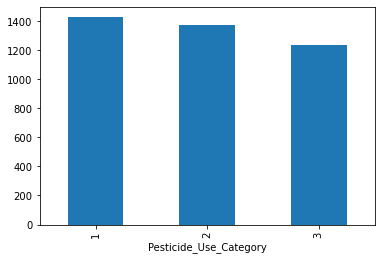

In [46]:
grp=df.groupby('Pesticide_Use_Category')['Estimated_Insects_Count'].mean().plot.bar()


The above is the bar graph between Pesticide_Use_Category and Estimated_Insects_Count. The place where pesticides are not used have high count of insects than it is used.

In [47]:
df.pivot_table('Estimated_Insects_Count', ['Crop_Type', 'Soil_Type'], 'Season')

Season                         1            2            3
Crop_Type Soil_Type                                       
0         0          1466.684162  1462.671088  1465.527611
          1          1303.987764  1321.641543  1308.779332
1         0          1247.459243  1246.510568  1249.191609
          1          1167.553985  1196.543193  1212.293819

The relation between soil,crop,season together and estimated insect count.

In [48]:
df.pivot_table('Number_Weeks_Used', ['Crop_Type', 'Soil_Type'], 'Season')

Season                       1          2          3
Crop_Type Soil_Type                                 
0         0          29.769998  29.658940  29.732920
          1          26.337570  26.536993  26.337568
1         0          25.923772  26.257356  26.380404
          1          28.710006  29.113338  29.727350

The relation between soil,crop,season together and number of weeks pesticide used.

Adding another column with value 1 everywhere for a required table below.

In [49]:
df['count']=1


In [50]:
df.pivot_table('count', ['Season','Soil_Type','Crop_Type'], ['Pesticide_Use_Category'],aggfunc='sum')

Pesticide_Use_Category          1        2       3
Season Soil_Type Crop_Type                        
1      0         0           53.0   6659.0  2014.0
                 1           74.0   4064.0  1726.0
       1         0           63.0   8587.0  1893.0
                 1           67.0      NaN  1702.0
2      0         0           99.0  10928.0  3296.0
                 1          125.0   6573.0  2954.0
       1         0           97.0  14154.0  3090.0
                 1          128.0      NaN  2766.0
3      0         0           31.0   4360.0  1259.0
                 1           34.0   2662.0  1213.0
       1         0           29.0   5722.0  1255.0
                 1           37.0      NaN  1144.0

In [51]:
df.pivot_table('count', ['Season','Soil_Type','Crop_Type'], ['Pesticide_Use_Category','Crop_Damage'],aggfunc='sum')

Pesticide_Use_Category         1                    2                      3  \
Crop_Damage                    0     1     2        0       1      2       0   
Season Soil_Type Crop_Type                                                     
1      0         0           7.0  39.0   7.0   5720.0   853.0   86.0  1218.0   
                 1          11.0  45.0  18.0   3832.0   210.0   22.0  1300.0   
       1         0           5.0  50.0   8.0   7706.0   789.0   92.0  1340.0   
                 1           8.0  46.0  13.0      NaN     NaN    NaN  1346.0   
2      0         0          18.0  68.0  13.0   9345.0  1414.0  169.0  2027.0   
                 1          14.0  84.0  27.0   6235.0   300.0   38.0  2192.0   
       1         0          16.0  68.0  13.0  12732.0  1283.0  139.0  2127.0   
                 1          18.0  77.0  33.0      NaN     NaN    NaN  2157.0   
3      0         0           5.0  18.0   8.0   3720.0   567.0   73.0   759.0   
                 1           5.0  16.0  13.0   2523.0   131.0    8.0   910.0   
       1         0           6.0  18.0   5.0   5145.0   525.0   52.0   882.0   
                 1           5.0  25.0   7.0      NaN     NaN    NaN   904.0   

Pesticide_Use_Category                    
Crop_Damage                     1      2  
Season Soil_Type Crop_Type                
1      0         0          626.0  170.0  
                 1          351.0   75.0  
       1         0          444.0  109.0  
                 1          295.0   61.0  
2      0         0          965.0  304.0  
                 1          615.0  147.0  
       1         0          774.0  189.0  
                 1          467.0  142.0  
3      0         0          400.0  100.0  
                 1          251.0   52.0  
       1         0          303.0   70.0  
                 1          190.0   50.0

The above two tables shows the total relation among all less uniqueno. columns like soiltype,croptype,season,pesticide used and cropdamage. The value inside it represents the total count of crop of those similar types.

The below bar graphs represents the relation with target column and some other columns.

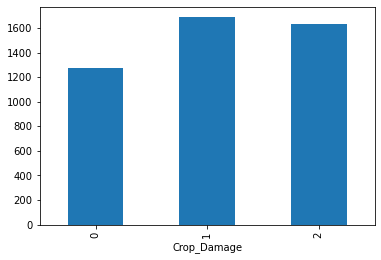

In [52]:
df.groupby('Crop_Damage')['Estimated_Insects_Count'].mean().plot.bar()

More Crops are damaged by insects.

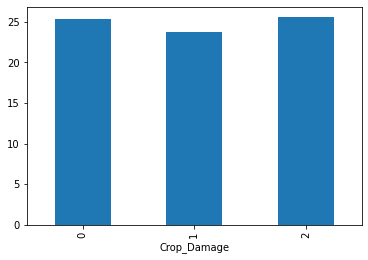

In [53]:
df.groupby('Crop_Damage')['Number_Doses_Week'].mean().plot.bar()

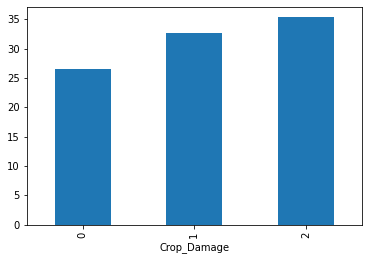

In [54]:
df.groupby('Crop_Damage')['Number_Weeks_Used'].mean().plot.bar()

Excessive use of pesticides damaged the crop a lot.

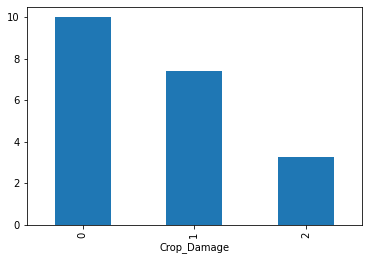

In [55]:
df.groupby('Crop_Damage')['Number_Weeks_Quit'].mean().plot.bar()

The quiting of the use of pesticides mostly prevented crop damage.

# Feature Engineering

The below table adds total doses column in the data on the basics of use of pesticides doses per week and number of weeks of its use.

In [56]:
df['Total_Doses']=df['Number_Doses_Week']*df['Number_Weeks_Used']
df[['Total_Doses','Number_Weeks_Used','Number_Doses_Week']].tail()

,Total_Doses,Number_Weeks_Used,Number_Doses_Week
88853,120,12,10
88854,200,20,10
88855,600,40,15
88856,250,25,10
88857,740,37,20


The below table adds Total days column which is sum of no. of weeks of pesticide use and its quiting.

In [57]:
df['Total_Days']=df['Number_Weeks_Quit']+df['Number_Weeks_Used']
df[['Total_Days','Number_Weeks_Used','Number_Weeks_Quit']].tail()

,Total_Days,Number_Weeks_Used,Number_Weeks_Quit
88853,21,12,9
88854,58,20,38
88855,48,40,8
88856,43,25,18
88857,44,37,7


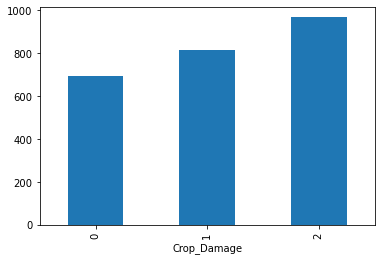

In [58]:
df.groupby('Crop_Damage')['Total_Doses'].mean().plot.bar()

The above bar plot shows that crops are mostly damaged due to over doses of pesticides and even due to some other reasons.

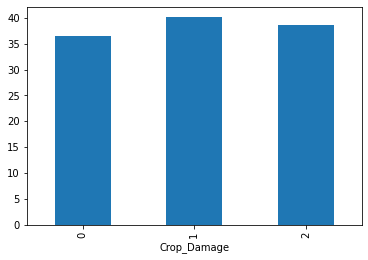

In [59]:
df.groupby('Crop_Damage')['Total_Days'].mean().plot.bar()

The above bar plot shows a slight equilibrum in all 3 cases.

The below four crosstab shows the relation among crop damage,season,croptype,soiltype and pesticide used category. The values represent the count of crops.

In [60]:
pd.crosstab(df['Crop_Damage'],df['Season'])

Season,1,2,3
Crop_Damage,,,
0,22493,36881,14864
1,3748,6115,2444
2,661,1214,438


In [61]:
pd.crosstab(df['Crop_Damage'],df['Crop_Type'])

Crop_Type,0,1
Crop_Damage,,
0,52778,21460
1,9204,3103
2,1607,706


In [62]:
pd.crosstab(df['Crop_Damage'],df['Soil_Type'])

Soil_Type,0,1
Crop_Damage,,
0,39841,34397
1,6953,5354
2,1330,983


In [63]:
pd.crosstab(df['Crop_Damage'],df['Pesticide_Use_Category'])

Pesticide_Use_Category,1,2,3
Crop_Damage,,,
0,118,56958,17162
1,554,6072,5681
2,165,679,1469


# MODEL BUILDING

All the columns except Crop Damage are stored under feature_table. And Crop Damage values are stored are in target_values.
StandardScaler is used from preprocessing of sklearn. It changes the values such that the standard deviation distribution from the mean equals one.Most values lies b/w -1 & 1.


feature_table values has been been transformed and fitted by standardscaler. 

In [64]:
feature_table = df[["Estimated_Insects_Count","Crop_Type","Soil_Type","Pesticide_Use_Category","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit","Season"]]

In [65]:
from sklearn import preprocessing
ft = preprocessing.StandardScaler().fit(feature_table)

In [66]:
feature_table = ft.transform(feature_table)
target_values = df["Crop_Damage"].values

K FOLD CROSS VALIDATION

Cross validation is a technique to evaluate predictive models by dividing the original data into training set to train the model and test set to evaluate it.The test set is considered as validation set here.
In K-Fold cross validation, the original sample is divided randomly into k equal subsamples.From which one subsample is considered as validation set and rest k-1 are taken as training set. The sample step is repeated for all the subsamples.
The advantages of this are :- It prevents overfitting. Reduced bias. Variance is reduced. Less Computation time.

ACCURACY

It is an evaluation metric for classification problem. It is the ratio between correct prediction and total prediction.
The increase in K value of K-fold cross validation increases the sample accuracy.

CROSS_VAL_SCORE

This is the way to implement kfold tenhnique on an estimator. It calculates the score for each cv split with the help of evaluation metrics.

In all the algorithm for predicting different models,K-fold technique is used and for evaluating it accuracy is used.
The value of k in all cases ais 30 with random state of 7.

LOGISTIC REGRESSION

Logistic Regression is a supervised algorithm.It is used in classification problems.It is a predictive analysis.The cost function of it is Log Loss.

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
kfold = KFold(n_splits=30, random_state=7)
scores=cross_val_score(lr, feature_table, target_values, scoring='accuracy', cv=kfold)
scores

array([0.8089129 , 0.82714382, 0.83659689, 0.8470628 , 0.83862255,
       0.84469953, 0.80351114, 0.82849426, 0.84098582, 0.85887914,
       0.84334909, 0.84571236, 0.81127616, 0.82444294, 0.8369345 ,
       0.83558406, 0.84537475, 0.83085753, 0.81093856, 0.82140446,
       0.84402431, 0.84199865, 0.8470628 , 0.83828494, 0.82005402,
       0.83625928, 0.82781904, 0.85786631, 0.84734887, 0.84329618])

In [68]:
scores.mean(),scores.std()

(0.8348265883980683, 0.013778466706371714)

KNN

It is also known as Lazy Learning algorithm. Here,in this algorithm a new test instance is located in a training dataset plot.
Then,the distance of new test instance is calculated from all train data points . After that it is K distance is taken from sorted list.And the prediction of that instance is made.
For classification problem, mode is considered. The value of K is determined by Elbow method. Here, k=3

In [69]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn=KNN(n_neighbors=3)
scores1=cross_val_score(knn, feature_table, target_values, scoring='accuracy', cv=kfold)
scores1

array([0.78933153, 0.79945982, 0.81397704, 0.82714382, 0.81971641,
       0.82916948, 0.78392978, 0.79945982, 0.80722485, 0.84672519,
       0.80857529, 0.82410533, 0.78899392, 0.80317353, 0.81093856,
       0.80925051, 0.83288319, 0.81195138, 0.79675895, 0.80351114,
       0.81904119, 0.82376772, 0.83018231, 0.82072924, 0.79574612,
       0.80925051, 0.80182309, 0.82815665, 0.81526511, 0.82370821])

In [70]:
scores1.mean(),scores1.std()

(0.8124649895714586, 0.01451389390215554)

DESICION TREE

It is a surpervised ML algorithm.It uses the tree representation to solve the problems where leaf node corresponds to class label and internal node of tree corresponds to attributes.Its main objective is to have pure nodes. Gini imurity and information gain are the best methods to get best split points.

Gini impurity = 1-Gini ; Information Gain = 1-Entropy

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier('entropy',random_state=7)
scores2=cross_val_score(dt, feature_table, target_values, scoring='accuracy', cv=kfold)
scores2

array([0.73024983, 0.74105334, 0.74375422, 0.76063471, 0.76198515,
       0.78055368, 0.72180959, 0.74746793, 0.7498312 , 0.78730587,
       0.74577988, 0.75759622, 0.7221472 , 0.73092505, 0.75118163,
       0.75489534, 0.75995949, 0.75286968, 0.7464551 , 0.73902768,
       0.75995949, 0.75995949, 0.76097232, 0.76603646, 0.73666442,
       0.74274139, 0.73801485, 0.77008778, 0.76055387, 0.77136103])

In [72]:
scores2.mean(),scores2.std()

(0.7517277955761157, 0.015497199846266461)

RANDOM FOREST

It is a supervised ML algorithm which creates desicion trees on data samples and predict from each of them. After that selects the best by votting. It reduces overfitting by averaging the result.

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
scores3=cross_val_score(rf, feature_table, target_values, scoring='accuracy', cv=kfold)
scores3

array([0.79945982, 0.80519919, 0.82343011, 0.83558406, 0.83018231,
       0.83760972, 0.7916948 , 0.82072924, 0.81566509, 0.85010128,
       0.82207968, 0.82613099, 0.79068197, 0.80654963, 0.81769075,
       0.81870358, 0.8403106 , 0.8227549 , 0.80925051, 0.80654963,
       0.82241729, 0.83085753, 0.82613099, 0.83659689, 0.8055368 ,
       0.81498987, 0.81363943, 0.84436192, 0.83316447, 0.83654171])

In [74]:
scores3.mean(),scores3.std()

(0.8211531589711945, 0.014780603986995829)

# Test Data Sample

In the following, the test dataset has been extracted and cleaned like train data set.

In [75]:
test=pd.read_csv("test.csv")

In [76]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [77]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [78]:
for i in range(0,len(test)):
    if pd.isnull(test['Number_Weeks_Used'][i])==True:
        if (test['Pesticide_Use_Category'][i] == 1):
            test['Number_Weeks_Used'][i] = 0.0
        else:
            test['Number_Weeks_Used'][i] = 20.0

In [79]:
test['Number_Weeks_Used'].isnull().sum()

0

In [80]:
test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [81]:
test['count']=1

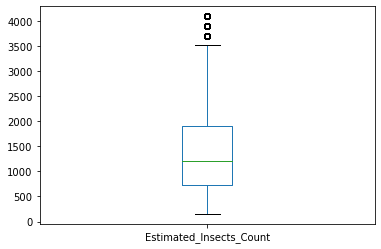

In [82]:
test['Estimated_Insects_Count'].plot.box()

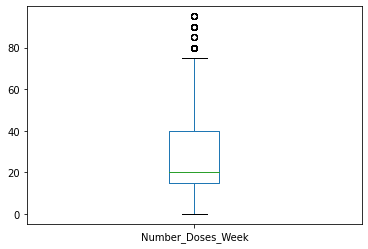

In [83]:
test['Number_Doses_Week'].plot.box()

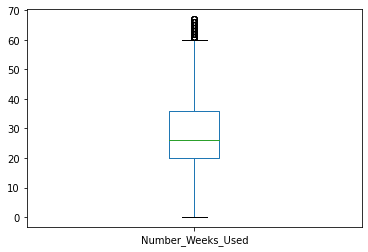

In [84]:
test['Number_Weeks_Used'].plot.box()

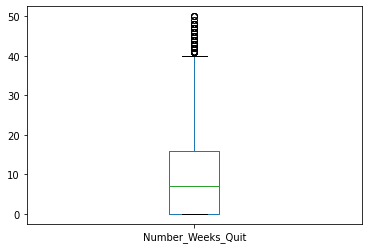

In [85]:
test['Number_Weeks_Quit'].plot.box()

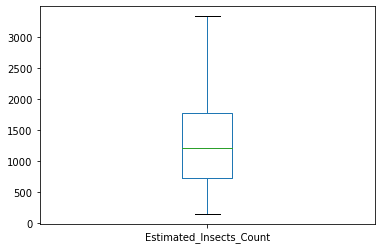

In [86]:
test.loc[test['Estimated_Insects_Count']>3500,'Estimated_Insects_Count']=np.median(test['Estimated_Insects_Count'])
test['Estimated_Insects_Count'].plot.box()

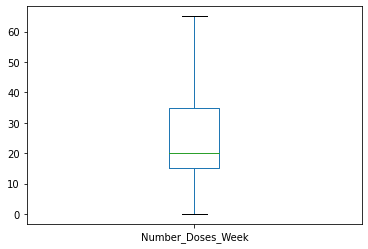

In [87]:
test.loc[test['Number_Doses_Week']>69,'Number_Doses_Week']=np.mean(test['Number_Doses_Week'])
test['Number_Doses_Week'].plot.box()

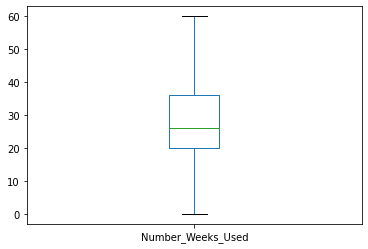

In [88]:
test.loc[test['Number_Weeks_Used']>60,'Number_Weeks_Used']=np.mean(test['Number_Weeks_Used'])
test['Number_Weeks_Used'].plot.box()

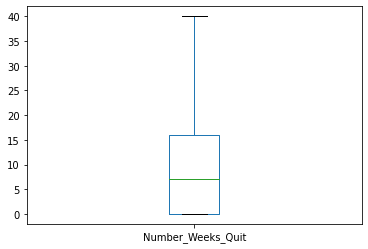

In [89]:
test.loc[test['Number_Weeks_Quit']>40,'Number_Weeks_Quit']=np.mean(test['Number_Weeks_Quit'])
test['Number_Weeks_Quit'].plot.box()

In [90]:
test=test.astype({'Estimated_Insects_Count':'int64','Number_Doses_Week':'int64','Number_Weeks_Used':'int64','Number_Weeks_Quit':'int64'})

In [91]:
test.dtypes

ID                         object
Estimated_Insects_Count     int64
Crop_Type                   int64
Soil_Type                   int64
Pesticide_Use_Category      int64
Number_Doses_Week           int64
Number_Weeks_Used           int64
Number_Weeks_Quit           int64
Season                      int64
count                       int64
dtype: object

In [92]:
test['Total_Doses']=test['Number_Doses_Week']*test['Number_Weeks_Used']
test[['Total_Doses','Number_Weeks_Used','Number_Doses_Week']].tail()

,Total_Doses,Number_Weeks_Used,Number_Doses_Week
59305,680,34,20
59306,640,32,20
59307,200,20,10
59308,280,28,10
59309,260,52,5


In [93]:
test['Total_Days']=test['Number_Weeks_Quit']+test['Number_Weeks_Used']
test[['Total_Days','Number_Weeks_Used','Number_Weeks_Quit']].tail()

,Total_Days,Number_Weeks_Used,Number_Weeks_Quit
59305,46,34,12
59306,42,32,10
59307,29,20,9
59308,45,28,17
59309,59,52,7


# Prediction

The test columns are stored in test_features and the values are transformed by StandardScaler.

In [94]:
test_features=test[["Estimated_Insects_Count","Crop_Type","Soil_Type","Pesticide_Use_Category","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit","Season"]]

In [95]:
test_features = ft.transform(test_features)

VOTING CLASSIFIER

It is a wrapper for set of different algorithms that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm. It chooses the best predicting model for the dataset.It yields better performance than any single algorithm.

In [96]:
from sklearn.ensemble import VotingClassifier

In [97]:
vc = VotingClassifier(estimators=[('lr',lr),('knn',knn),('dt',dt),('rf',rf)],voting='hard')
result=cross_val_score(vc, feature_table, target_values, scoring='accuracy', cv=kfold)
result

array([0.80418636, 0.8264686 , 0.83524646, 0.84402431, 0.84132343,
       0.84773801, 0.80519919, 0.82309251, 0.83625928, 0.8612424 ,
       0.83389602, 0.84098582, 0.80621202, 0.8193788 , 0.83119514,
       0.83254558, 0.84875084, 0.83423363, 0.81532748, 0.82072924,
       0.83423363, 0.84233626, 0.84301148, 0.84301148, 0.81836597,
       0.82815665, 0.82174207, 0.8507765 , 0.84599797, 0.84295846])

In [98]:
result.mean(),result.std()

(0.832620852536953, 0.01400266600601151)

Predicting the test target values i.e. Crop_Damage in test dataset

In [99]:
vc=vc.fit(feature_table,target_values)

In [100]:
test_Crop_Damage = vc.predict(test_features)

In [101]:
solution = pd.DataFrame(test_Crop_Damage)

In [107]:
id = test['ID']
sample_solution = pd.concat([id,solution],axis=1)
sample_solution.columns = ['ID','Crop_Damage']


The predicted dataset is saved in .csv file

In [108]:
sample_solution.to_csv('sample_solution.csv')

In [109]:
ss=pd.read_csv("sample_solution.csv")

In [110]:
ss.head()

,Unnamed: 0,ID,Crop_Damage
0,0,F00000002,1
1,1,F00000007,1
2,2,F00000011,1
3,3,F00000013,2
4,4,F00000014,1
